In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import sys
nx=801
ny=801
nz=187
nt=2501
dx=25
dt=1
def readfile(filename,n1=nx,n2=ny,n3=nz):
    f=open(filename)
    data=np.fromfile(f,dtype='float32')
    data=data.reshape((n1,n2,n3))
    return data

def imagesc(data,scale=1,cmap='jet'):
    nx,nz=np.shape(data)
    plt.imshow(data.T,vmin=scale*np.min(data),vmax=scale*np.max(data),extent=(0,nx*dx,0,nz*dx),aspect='auto', origin='lower',cmap=cmap)
    plt.colorbar()
    plt.gca().invert_yaxis() 
    plt.xlabel('distance(m)',fontsize=10)
    plt.ylabel('depth(m)',fontsize=10)
    plt.show()    
def plotseis(data,scale):
    nx,nz=np.shape(data)
    plt.imshow(data.T,vmin=scale*np.min(data),vmax=scale*np.max(data),extent=(0,nx*dx,0,nz*dt),aspect='auto', origin='lower',cmap='gray')
    plt.colorbar()
    plt.gca().invert_yaxis() 
    plt.xlabel('distance(m)',fontsize=10)
    plt.ylabel('Time(s)',fontsize=10)
    plt.show() 

plt.rcParams["figure.figsize"] = [12,4]

In [3]:
#地震记录展示
ishot=10
# record=0
# for ishot in range(1):
#     print(ishot)
record=readfile('record/record%d.dat'%(ishot),n1=nt,n2=nx,n3=ny)
plotseis(record[:,:,400].T,.01)

ValueError: cannot reshape array of size 200330100 into shape (2501,801,801)

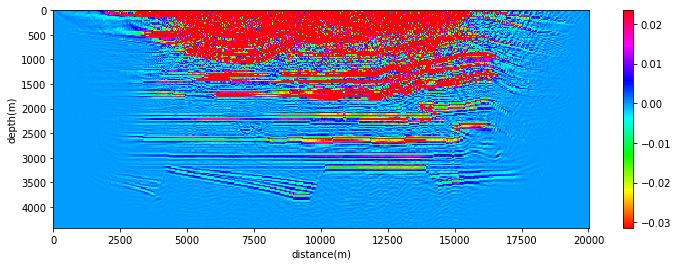

In [23]:
# image=readfile('image/image.dat',nx,ny,nz)
# illum=readfile('image/illum.dat',nx,ny,nz)
# i1=ndimage.laplace(image/illum)
# i1=ndimage.laplace(image)
imagesc(i1[:,400,10:],.01,'hsv')

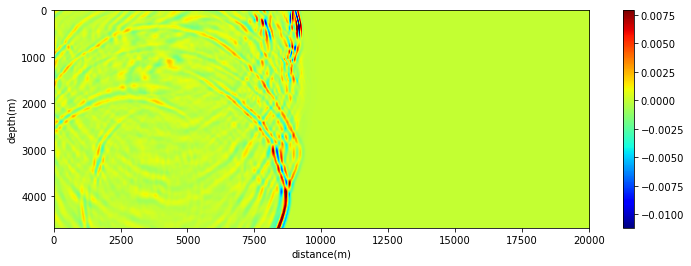

In [163]:
snap=readfile('snap/shot1it1400.dat')
# snap=readfile('snap/shot1it1200.dat-Reconstruction',nx,ny,nz)
# snap=readfile('snap/shot1it1000.dat-backward',nx,ny,nz)
imagesc(snap[:,400,:],0.5)

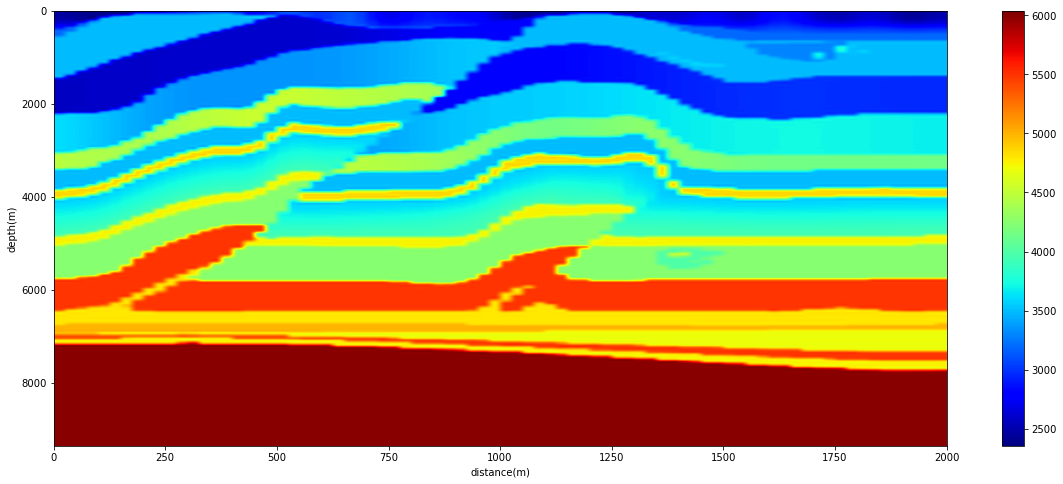

In [143]:
vp=readfile('./model/vp_481_80_374.dat',481,80,374)
# vp=readfile('./model/eps_801_801_187.dat',801,801,187)
imagesc(vp[400,:,:])